Strategies: 3. Formulae:3041


/Users/enniovisco/source/repos/distributed-monitor/preparation.ipynb:66: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  ],


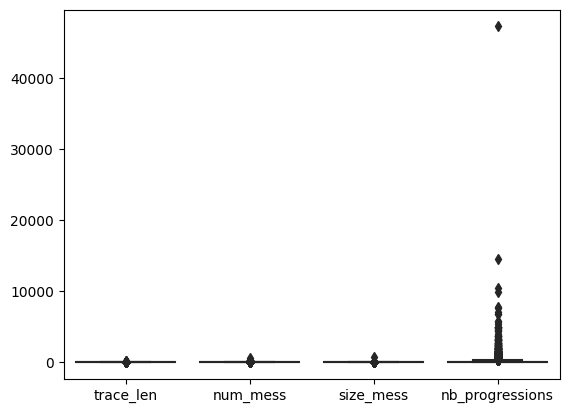

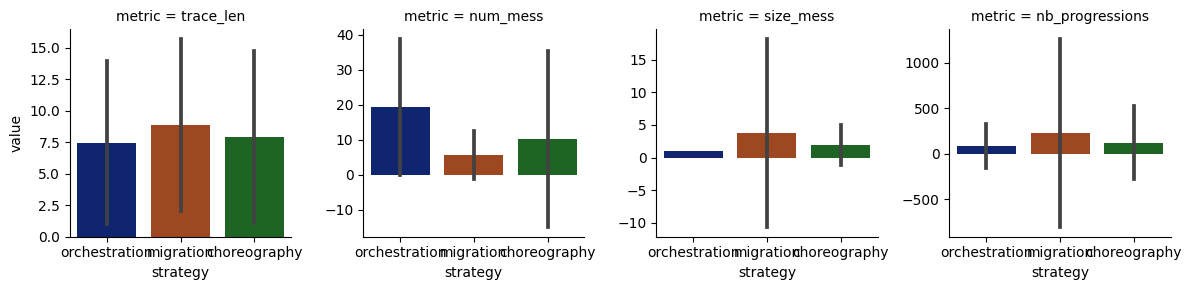

In [1]:
# noinspection PyUnresolvedReferences
# noinspection PyUnresolvedReferences
from ipynb.fs.full.preparation import expanded_df, expanded_df2

Datasets: 8. Strategies: 3. Single dataset Formulae:3073


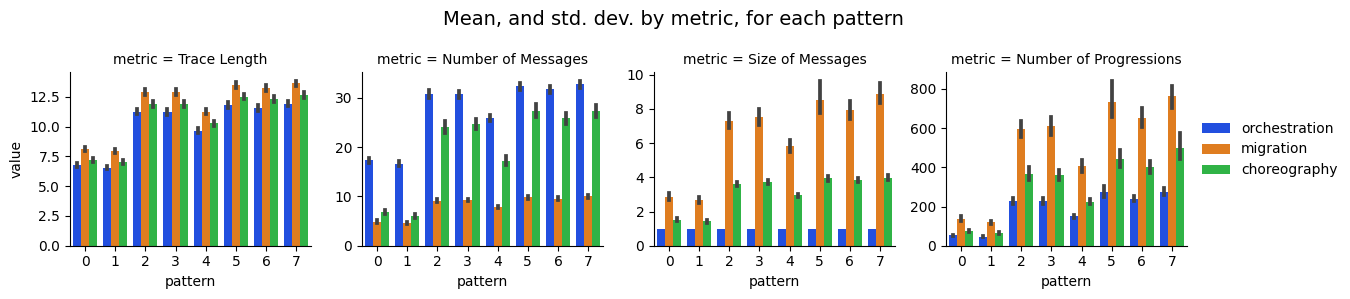

In [2]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_3 import full_scale_df_3

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

from decmon.learning import *

## Classification

We drop columns that are not numeric (and in our case, present in the dataset in other forms)

In [4]:
cols_to_drop = ['formula', 'trace', 'strategy']

In [5]:
TARGET = 'strategy_id'
N_CLASSES = 3 # orchestration, migration, choreography

In [6]:
final_df = clean_df(expanded_df, cols_to_drop)

In [7]:
X_train, X_test, y_train, y_test = prepare_learning_sets(final_df, TARGET)

### K-Neighbours Classifier

In [8]:
# K Neighbors Classifier
kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
kn_classifier.fit(X_train, y_train)

kn_classifier.score(X_test, y_test)

#y_pred = kn_classifier.predict(X_test)
#y_pred

0.9046401169163317

In [10]:
final_full_df = clean_df(full_scale_df_3, cols_to_drop)
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, TARGET)

kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
classifier = kn_classifier.fit(f_X_train, f_y_train)

mean_accuracy = classifier.score(f_X_test, f_y_test)
mean_accuracy

0.9667646878637506

In [15]:
pred_y = classifier.predict(f_X_test)
f1_score(pred_y, f_y_test, average=None)

array([0.95036114, 0.96541853, 0.98438071])